In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import solve_ivp
import pandas as pd

# Trayectorias con ruido

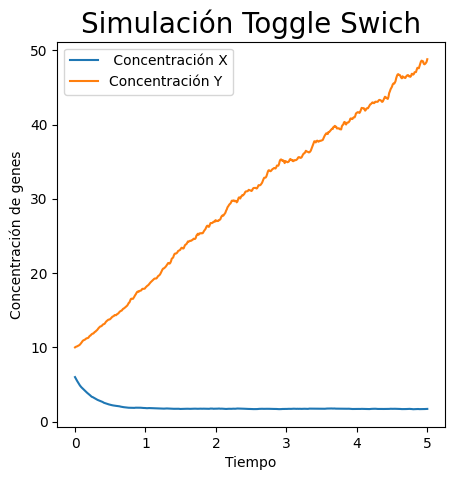

In [27]:
for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]
        da1 = random.uniform(-.5, .5)
        da2 = random.uniform(-.5, .5)
        db1 = random.uniform(-.5, .5)
        db2 = random.uniform(-.5, .5)
        dd1 = random.uniform(-.5, .5)
        dd2 = random.uniform(-.5, .5)
        dn = random.uniform(-.5, .5)

        # definimos cada ODE
        dX_dt=(a1+da1)/(1+Y**n)-(d1+dd1)*X+b1+db1
        dY_dt=(a2+da2)/(1+X**n)-(d2+dd2)*Y+b2+db2

        return [dX_dt, dY_dt]

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 500)

    for i_ci in range(0, 1):
        # Definimos las condiciones iniciales
        y0 = np.array([random.randint(0, 10), random.randint(0, 10)])

        # Resolvemos
        # Modificar manualmente el intervalo de tiempo
        sol = solve_ivp(f, t_span, y0, t_eval=times)
        # sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        tiempo = sol.t
        var1 = sol.y[0]
        var2 = sol.y[1]

        # Graficamos
        plt.figure(figsize=(5, 5))
        plt.plot(tiempo, var1, label=" Concentración X")
        plt.plot(tiempo, var2, label="Concentración Y")
        plt.xlabel('Tiempo')
        plt.ylabel('Concentración de genes')
        plt.title('Simulación Toggle Swich', fontsize=20)
        plt.legend()
        plt.show()

## Graficamos con ruido y determinista

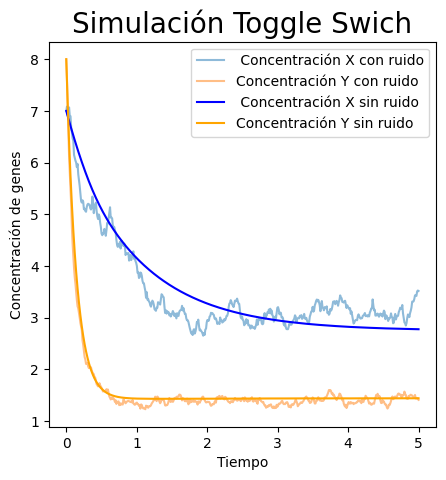

In [69]:
for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]
        da1 = random.uniform(-10, 10)
        da2 = random.uniform(-10, 10)
        db1 = random.uniform(-10, 10)
        db2 = random.uniform(-10, 10)
        dd1 = random.uniform(-10, 10)
        dd2 = random.uniform(-10, 10)
        dn = random.uniform(-10, 10)

        # definimos cada ODE
        dX_dt=(a1+da1)/(1+Y**n)-(d1+dd1)*X+b1+db1
        dY_dt=(a2+da2)/(1+X**n)-(d2+dd2)*Y+b2+db2

        return [dX_dt, dY_dt]

    def f_without_noise(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        dX_dt=a1/(1+Y**n)-d1*X+b1
        dY_dt=a2/(1+X**n)-d2*Y+b2

        return [dX_dt, dY_dt]

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 500)

    for i_ci in range(0, 1):
        # Definimos las condiciones iniciales
        y0 = np.array([random.randint(0, 10), random.randint(0, 10)])

        # Resolvemos
        sol = solve_ivp(f, t_span, y0, t_eval=times)
        tiempo = sol.t
        var1 = sol.y[0]
        var2 = sol.y[1]
        
        # Resolvemos la versión sin ruido
        sol_without_noise = solve_ivp(f_without_noise, t_span, y0, t_eval=times)
        var1_without_noise = sol_without_noise.y[0]
        var2_without_noise = sol_without_noise.y[1]

        # Graficamos
        plt.figure(figsize=(5, 5))
        plt.plot(tiempo, var1, label=" Concentración X con ruido", alpha=0.5)
        plt.plot(tiempo, var2, label="Concentración Y con ruido", alpha=0.5)
        plt.plot(tiempo, var1_without_noise, label=" Concentración X sin ruido", color = 'blue')
        plt.plot(tiempo, var2_without_noise, label="Concentración Y sin ruido", color = 'orange')
        plt.xlabel('Tiempo')
        plt.ylabel('Concentración de genes')
        plt.title('Simulación Toggle Swich', fontsize=20)
        plt.legend()
        plt.show()

# Campo vectorial con ruido

C:\Users\rafae\AppData\Local\Temp\ipykernel_8536\4142821034.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  dX_dt=(a1+da1)/(1+Y**(n+dn))-(d1+dd1)*X+b1+db1
C:\Users\rafae\AppData\Local\Temp\ipykernel_8536\4142821034.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  dY_dt=(a2+da2)/(1+X**(n+dn))-(d2+dd2)*Y+b2+db2


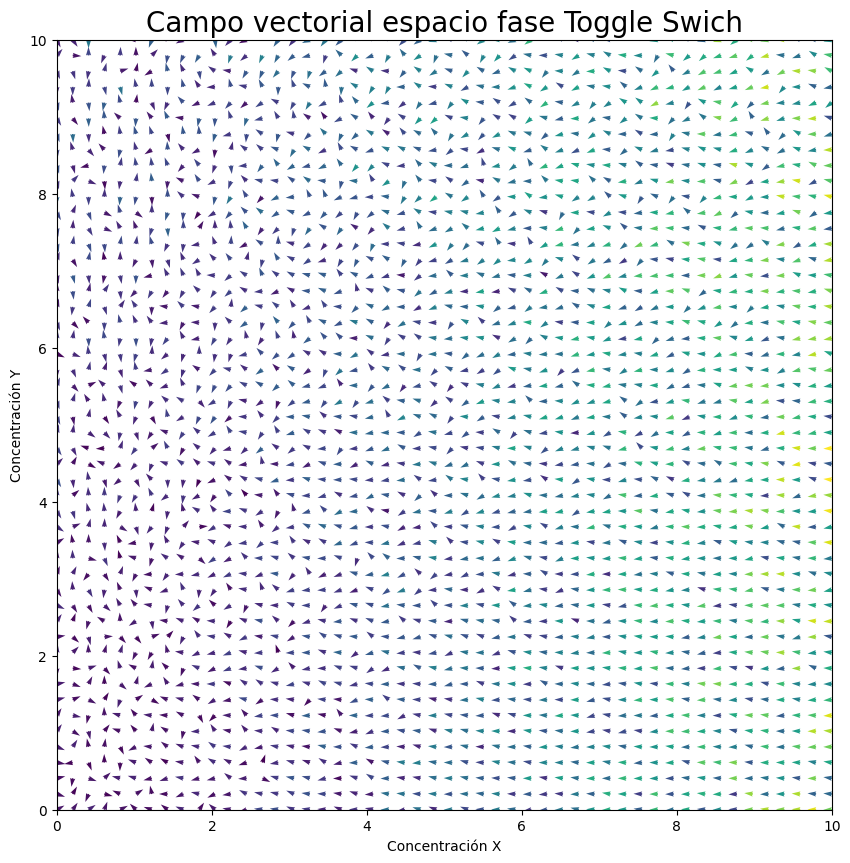

In [54]:
for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]

    for i_ci in range(0, 1):
        x_range_neg = 0
        x_range_pos = 10
        y_range_neg = 0
        y_range_pos =10

        y1 = np.linspace(x_range_neg, x_range_pos, 50)
        y2 = np.linspace(y_range_neg, y_range_pos, 50)

        Y1, Y2 = np.meshgrid(y1, y2)

        t1 = 0

        NI, NJ = Y1.shape
        u, v = np.zeros((NI, NJ)), np.zeros((NI, NJ))

        for i in range(NI):
            for j in range(NJ):
                # asignar a cada ODE a un elemento de vector
                X = Y1[i, j]
                Y = Y2[i, j]
                da1 = random.uniform(-5, 5)
                da2 = random.uniform(-5, 5)
                db1 = random.uniform(-5, 5)
                db2 = random.uniform(-5, 5)
                dd1 = random.uniform(-5, 5)
                dd2 = random.uniform(-5, 5)
                dn = random.uniform(-5, 5)

                # definimos cada ODE
                dX_dt=(a1+da1)/(1+Y**(n+dn))-(d1+dd1)*X+b1+db1
                dY_dt=(a2+da2)/(1+X**(n+dn))-(d2+dd2)*Y+b2+db2

                u[i, j], v[i, j] = dX_dt, dY_dt

        M = (np.hypot(u, v))
        u /= M
        v /= M

        plt.figure(figsize=(10, 10))
        Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
        plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
        plt.xlim([x_range_neg, x_range_pos])
        plt.ylim([y_range_neg, y_range_pos])
        plt.xlabel('Concentración X')
        plt.ylabel('Concentración Y')


## Graficamos con ruido y determinista

C:\Users\rafae\AppData\Local\Temp\ipykernel_8536\719981829.py:52: RuntimeWarning: divide by zero encountered in double_scalars
  dX_dt_noise = (a1 + da1) / (1 + Y**dn) - (d1 + dd1)*X + b1 + db1
C:\Users\rafae\AppData\Local\Temp\ipykernel_8536\719981829.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  dY_dt_noise = (a2 + da2) / (1 + X**dn) - (d2 + dd2)*Y + b2 + db2


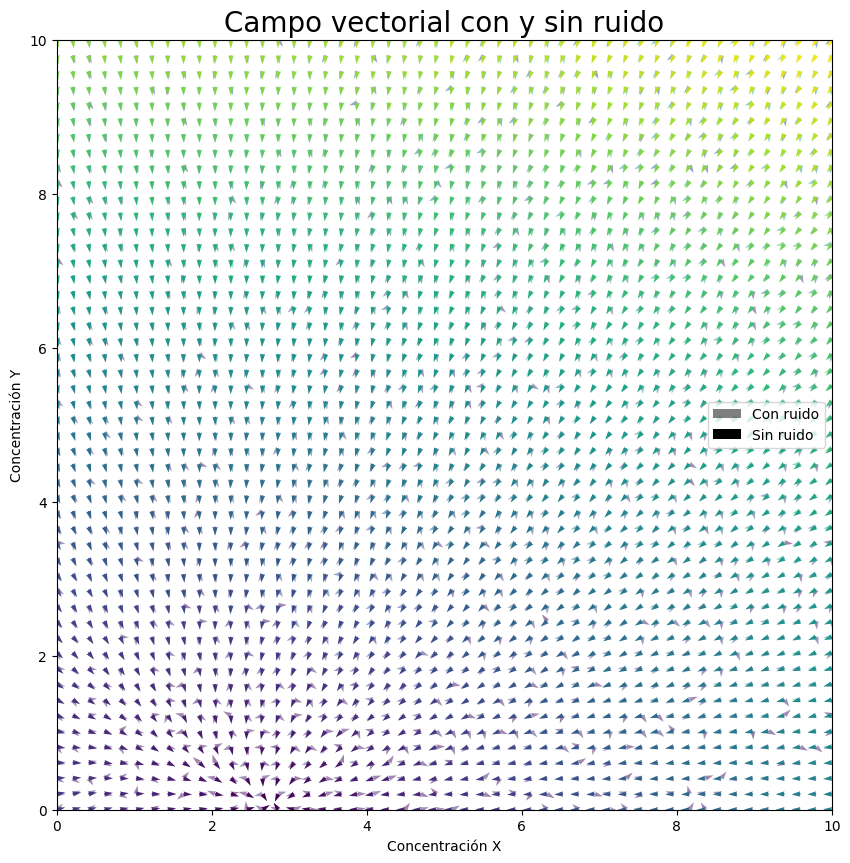

[4, 4, 10, 0, 5, 7, 2]


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import random

for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 500)

    for i_ci in range(0, 1):
        x_range_neg = 0
        x_range_pos = 10
        y_range_neg = 0
        y_range_pos = 10

        y1 = np.linspace(x_range_neg, x_range_pos, 50)
        y2 = np.linspace(y_range_neg, y_range_pos, 50)

        Y1, Y2 = np.meshgrid(y1, y2)

        t1 = 0

        NI, NJ = Y1.shape
        u, v = np.zeros((NI, NJ)), np.zeros((NI, NJ))
        u_no_noise, v_no_noise = np.zeros((NI, NJ)), np.zeros((NI, NJ))

        for i in range(NI):
            for j in range(NJ):
                # asignar a cada ODE a un elemento de vector
                X = Y1[i, j]
                Y = Y2[i, j]
                da1 = random.uniform(-5, 5)
                da2 = random.uniform(-5, 5)
                db1 = random.uniform(-5, 5)
                db2 = random.uniform(-5, 5)
                dd1 = random.uniform(-5, 5)
                dd2 = random.uniform(-5, 5)
                dn = random.uniform(-.5, .5)

                # definimos cada ODE
                dX_dt_noise = (a1 + da1) / (1 + Y**dn) - (d1 + dd1)*X + b1 + db1
                dY_dt_noise = (a2 + da2) / (1 + X**dn) - (d2 + dd2)*Y + b2 + db2

                dX_dt = a1 / (1 + Y**n) - d1 * X + b1
                dY_dt = a2 / (1 + X**n) - d2 * Y + b2

                u[i, j], v[i, j] = dX_dt_noise, dY_dt_noise
                u_no_noise[i, j], v_no_noise[i, j] = dX_dt, dY_dt

        M = (np.hypot(u, v))
        u /= M
        v /= M

        M_no_noise = (np.hypot(u_no_noise, v_no_noise))
        u_no_noise /= M_no_noise
        v_no_noise /= M_no_noise

        # Plotting both fields on the same figure
        plt.figure(figsize=(10, 10))
        Q_noise = plt.quiver(Y1, Y2, u, v, M, angles='xy', alpha=0.5, label="Con ruido")
        Q_no_noise = plt.quiver(Y1, Y2, u_no_noise, v_no_noise, M_no_noise, angles='xy', alpha=1, label="Sin ruido")
        plt.title('Campo vectorial con y sin ruido', fontsize=20)
        plt.xlim([x_range_neg, x_range_pos])
        plt.ylim([y_range_neg, y_range_pos])
        plt.xlabel('Concentración X')
        plt.ylabel('Concentración Y')
        plt.legend()
        plt.show()

print(coef1)